In [1]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

In [25]:
data_path=None
all_variables=None
test_path=None
target=None
target='default.payment.next.month'
nthreads=1 
run_time=222
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0 
no_rows=100000
prod_rows=0
rid=None
classification=True

In [3]:
min_mem_size=6
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
max_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
print(max_mem_size)
if min_mem_size > max_mem_size:
  min_mem_size=max_mem_size    

6
3


In [4]:
classification=True
#target='Buy'

In [5]:
data_file='data/UCI_Credit_Card.csv'
data_path=os.path.join(os.path.abspath(os.curdir)
,data_file)
data_path

'/Users/bear/Downloads/IIT_AGNE/data/UCI_Credit_Card.csv'

In [6]:
def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

In [7]:
# Automodeler start

if rid is None:      
  run_id=alphabet(9)
else:      
  run_id=rid     

print (run_id) # run_id to std out


0kAvMuUMo


In [8]:
print(min_mem_size,' ',max_mem_size)

3   3


In [9]:
# 65535 Highest port no
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o

h2o.init(strict_version_check=False,min_mem_size_GB=2,max_mem_size_GB=3,port=port_no) # start h2o

    

Checking whether there is an H2O instance running at http://localhost:39170..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /Users/bear/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpk7p8ucg_
  JVM stdout: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpk7p8ucg_/h2o_bear_started_from_python.out
  JVM stderr: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpk7p8ucg_/h2o_bear_started_from_python.err
  Server is running at http://127.0.0.1:39170
Connecting to H2O server at http://127.0.0.1:39170... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,1 month and 18 days
H2O cluster name:,H2O_from_python_bear_hrts1x
H2O cluster total nodes:,1
H2O cluster free memory:,2.875 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [10]:
print(data_path)

/Users/bear/Downloads/IIT_AGNE/data/UCI_Credit_Card.csv


In [11]:
df = h2o.import_file(data_path)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
# %tb

In [13]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [14]:
df.describe()

Rows:30000
Cols:25




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15000.5,167484.32266666667,1.6037333333333332,1.8531333333333335,1.5518666666666667,35.4855,-0.016700000000000027,-0.13376666666666664,-0.16619999999999993,-0.22066666666666668,-0.26620000000000005,-0.2911000000000001,51223.3309,49179.07516666667,47013.1548,43262.94896666665,40311.40096666667,38871.7604,5663.5805,5921.1635,5225.6815,4826.076866666666,4799.387633333331,5215.502566666667,0.2212
maxs,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0
sigma,8660.398374208891,129747.6615672024,0.48912919609026034,0.7903486597207292,0.5219696006132487,9.217904068090185,1.1238015279973346,1.1971859730345533,1.1968675684465733,1.1691386224023375,1.1331874060027483,1.1499876256079027,73635.86057552957,71173.76878252834,69349.38742703683,64332.85613391631,60797.15577026487,59554.10753674573,16563.280354025766,23040.87040205723,17606.961469803104,15666.159744032007,15278.30567914479,17777.465775435303,0.41506180569093337
zeros,0,0,0,14,54,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [26]:
df.shape

(30000, 25)

In [27]:
if target==None:
  target=df.columns[-1]   
y = target

In [28]:
print(y)

default.payment.next.month


In [36]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [37]:
X=get_independent_variables(df, target) 
print(X)

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [40]:
def impute_missing_values(df, x, scal=False):
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in x:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    _ = df[reals].impute(method='mean')
    _ = df[ints].impute(method='median')
    if scal:
        df[reals] = df[reals].scale()
        df[ints] = df[ints].scale()    
    return df

In [41]:
df=impute_missing_values(df,X)

In [43]:
# Set up AutoML

aml = H2OAutoML(max_runtime_secs=run_time)

# train model

model_start_time = time.time()
  
try:
  aml.train(x=X,y=y,training_frame=df)  # Change training_frame=train
except Exception as e:
  logging.critical('aml.train') 
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()   
  sys.exit(4)
  
meta_data['model_execution_time'] = time.time() - model_start_time  

In [44]:
aml.train(x=X,y=y,training_frame=df)  

AutoML progress: |█████████████████████████████████████████████████████████| 100%


In [45]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190316_012004,0.132996,0.364687,0.132996,0.266008,0.255527
StackedEnsemble_BestOfFamily_AutoML_20190316_012004,0.133167,0.364921,0.133167,0.266349,0.255663
XGBoost_1_AutoML_20190316_012004,0.133322,0.365132,0.133322,0.269817,0.25603
GBM_2_AutoML_20190316_012004,0.133818,0.365811,0.133818,0.267148,0.256351
GBM_1_AutoML_20190316_012004,0.133859,0.365867,0.133859,0.268027,0.25637
GBM_3_AutoML_20190316_012004,0.13388,0.365896,0.13388,0.26666,0.256555
GBM_4_AutoML_20190316_012004,0.135269,0.367789,0.135269,0.266836,0.258013
XGBoost_2_AutoML_20190316_012004,0.135369,0.367925,0.135369,0.273653,0.25902
XGBoost_3_AutoML_20190316_012004,0.137617,0.370967,0.137617,0.276157,0.262327
XRT_1_AutoML_20190316_012004,0.140828,0.375271,0.140828,0.272865,0.264961


In [47]:
# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()


# STart best model as first model

model_set=aml_leaderboard_df['model_id']


In [48]:
mod_best=h2o.get_model(model_set[0])

In [49]:
# Get stacked ensemble  
mod_best.algo

'stackedensemble'

In [51]:
mod=h2o.get_model(model_set[3])

In [52]:
mod.algo

'gbm'

In [53]:
dir(mod)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_end_time',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_make_model',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_run_time',
 '_start_time',
 '_verify_training_frame_params',
 '_xval_keys',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'balance_classes',
 'biases',
 'build_tree_one_node',
 'calibrate_model',
 'calibration_frame',
 'categorical_encoding',
 'catoffsets',
 '

In [55]:
mod   

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20190316_012004


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11929165733119337
RMSE: 0.3453862436913106
MAE: 0.25195608454618096
RMSLE: 0.24171161630636318
Mean Residual Deviance: 0.11929165733119337

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.13381792295432315
RMSE: 0.3658113215228899
MAE: 0.26714761579053947
RMSLE: 0.2563514389097315
Mean Residual Deviance: 0.13381792295432315
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2671476,0.0016803,0.2712587,0.2646183,0.2662308,0.2682067,0.2654237
mean_residual_deviance,0.1338179,0.0016097,0.1367115,0.130379,0.1336236,0.1358313,0.1325442
mse,0.1338179,0.0016097,0.1367115,0.130379,0.1336236,0.1358313,0.1325442
r2,0.2231702,0.0096460,0.2063285,0.2373058,0.2229959,0.2097306,0.2394901
residual_deviance,0.1338179,0.0016097,0.1367115,0.130379,0.1336236,0.1358313,0.1325442
rmse,0.3657981,0.0022020,0.3697452,0.3610803,0.3655457,0.3685530,0.3640662
rmsle,0.2563433,0.0014418,0.2590297,0.2536743,0.2566450,0.2579592,0.2544083


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-03-16 01:23:32,4.111 sec,0.0,0.4150549,0.3445411,0.1722706
,2019-03-16 01:23:32,4.199 sec,5.0,0.3825782,0.3127187,0.1463661
,2019-03-16 01:23:32,4.278 sec,10.0,0.3674307,0.2922125,0.1350053
,2019-03-16 01:23:32,4.352 sec,15.0,0.3600501,0.2788350,0.1296361
,2019-03-16 01:23:32,4.424 sec,20.0,0.3557247,0.2706846,0.1265401
,2019-03-16 01:23:33,4.497 sec,25.0,0.3526505,0.2641573,0.1243624
,2019-03-16 01:23:33,4.571 sec,30.0,0.3504876,0.2597811,0.1228416
,2019-03-16 01:23:33,4.643 sec,35.0,0.3480744,0.2559304,0.1211558
,2019-03-16 01:23:33,4.715 sec,40.0,0.3463267,0.2530988,0.1199422
,2019-03-16 01:23:33,4.776 sec,44.0,0.3453862,0.2519561,0.1192917


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
PAY_0,3838.3425293,1.0,0.4758759
PAY_2,938.2280884,0.2444357,0.1163211
LIMIT_BAL,330.9458313,0.0862210,0.0410305
PAY_3,303.5994873,0.0790965,0.0376401
AGE,280.2983398,0.0730259,0.0347513
---,---,---,---
PAY_AMT4,85.8090744,0.0223558,0.0106386
PAY_AMT6,81.0929642,0.0211271,0.0100539
PAY_AMT3,72.7764130,0.0189604,0.0090228
MARRIAGE,59.9736557,0.0156249,0.0074355



See the whole table with table.as_data_frame()


In [56]:
mod.varimp()

[('PAY_0', 3838.342529296875, 1.0, 0.4758758572725468),
 ('PAY_2', 938.2280883789062, 0.24443573787844702, 0.11632106631095351),
 ('LIMIT_BAL', 330.9458312988281, 0.08622102607383825, 0.041030504697806384),
 ('PAY_3', 303.5994873046875, 0.07909650714791788, 0.03764011814627955),
 ('AGE', 280.29833984375, 0.07302587971352736, 0.03475125311175672),
 ('BILL_AMT1', 269.59771728515625, 0.07023805593883316, 0.033424595083049326),
 ('ID', 262.7945251464844, 0.06846562628026433, 0.0325811385998226),
 ('PAY_4', 183.46783447265625, 0.04779871339577, 0.022746253713736817),
 ('PAY_6', 173.6841583251953, 0.04524978086231704, 0.021533278259250003),
 ('BILL_AMT2', 166.3782196044922, 0.0433463710793341, 0.02062749149703205),
 ('PAY_5', 124.3908462524414, 0.03240743766430556, 0.015421917180508029),
 ('PAY_AMT1', 119.65201568603516, 0.031172834308759192, 0.01483439925029584),
 ('PAY_AMT2', 117.95890045166016, 0.030731728487313613, 0.014624487639367512),
 ('BILL_AMT3', 110.87213897705078, 0.0288854207592

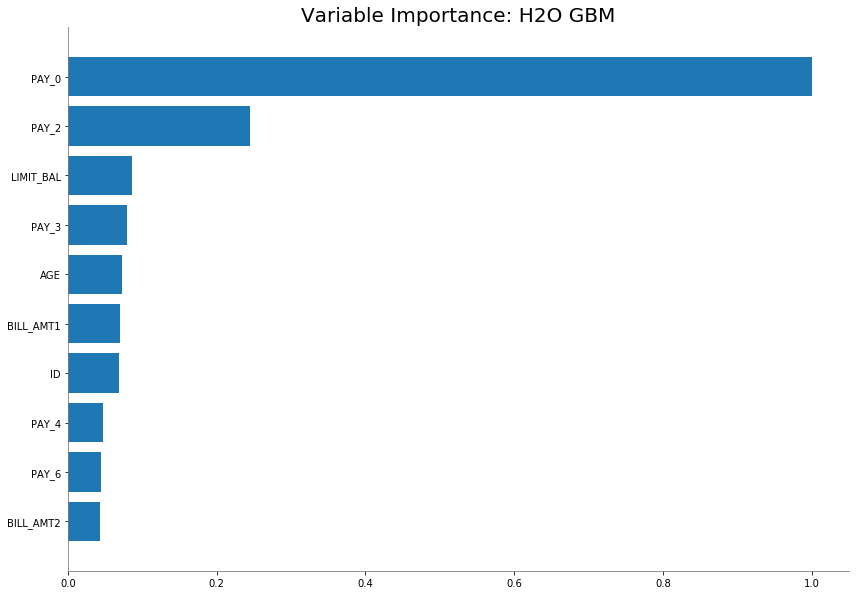

In [57]:
mod.varimp_plot()

In [58]:
h2o.cluster().shutdown()

H2O session _sid_b2d5 closed.
